In [5]:
!pip install -q sentence-transformers

In [12]:
# STEP 1 — Install and Import

In [6]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("/content/dataset.csv")

In [9]:
df['text'] = df['Heading'].fillna('') + ' ' + df['Body'].fillna('')

In [10]:
print("Dataset loaded:", df.shape)
df.head()


Dataset loaded: (7644, 4)


,Heading,Body,URL,text
0,free speech not hate speech madras high court ...,madras high court issue significant remark ami...,https://www.indiatoday.in/law/high-courts/stor...,free speech not hate speech madras high court ...
1,comment take context say us cop mock indian st...,seattle police officer guild friday come defen...,https://www.indiatoday.in/world/story/indian-s...,comment take context say us cop mock indian st...
2,first meeting one nation one election committe...,first official meeting one nation one election...,https://www.indiatoday.in/india/story/one-nati...,first meeting one nation one election committe...
3,us airlines flight depressurize midair plummet...,united airlines jet head rome turn around less...,https://www.indiatoday.in/world/story/us-fligh...,us airlines flight depressurize midair plummet...
4,terrorist kill security force foil infiltratio...,three terrorist kill infiltration bid foil sec...,https://www.indiatoday.in/india/story/one-terr...,terrorist kill security force foil infiltratio...


In [13]:
model = SentenceTransformer('all-MiniLM-L6-v2')


embeddings = model.encode(df['text'].tolist(), show_progress_bar=True)
np.save("/content/embeddings_headings.npy", embeddings)

print("Embeddings shape:", embeddings.shape)

Batches:   0%|          | 0/239 [00:00<?, ?it/s]

Embeddings shape: (7644, 384)


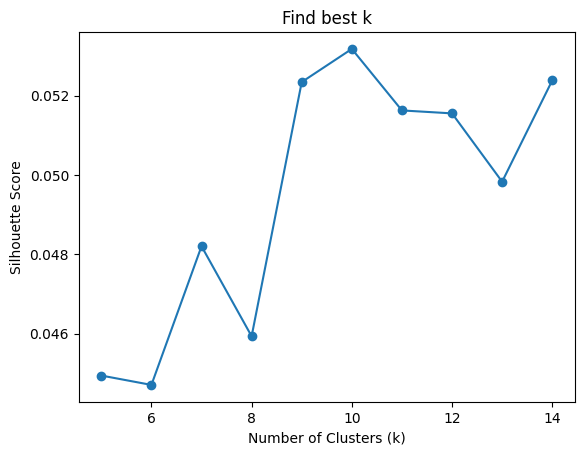

In [14]:

# STEP 4 — Choose Number of Clusters

scores = []
K = range(5, 15)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(embeddings)
    scores.append(silhouette_score(embeddings, labels))

plt.plot(K, scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Find best k")
plt.show()


In [15]:

# STEP 5 — Cluster with KMeans

n_clusters = 10  # pick based on plot

kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)

df['Cluster'] = clusters


In [16]:

# STEP 6 — See Top Items from Each Cluster

for c in range(n_clusters):
    print(f"\n--- Cluster {c} ---")
    sample = df[df['Cluster']==c].head(10)
    print(sample[['Heading','Body']].to_string(index=False))



--- Cluster 0 ---
                                                                       Heading                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [17]:

# STEP 7 — Map Cluster → Category Names

cluster_to_category = {
    0: "Judiciary",
    1: "Crime",
    2: "Politics",
    3: "Science",
    4: "Sports",
    5: "Health",
    6: "Entertainment",
    7: "Economy",
    8: "Defence",
    9: "Foreign Affairs"
}

df['Category'] = df['Cluster'].map(cluster_to_category)


In [19]:

# STEP 8 — Save Labelled CSV

df[['Heading', 'Body', 'Category', 'URL']].to_csv("/content/labelled.csv", index=False)

print("✅ labelled.csv saved to datasets/labelled.csv")


✅ labelled.csv saved to datasets/labelled.csv
